Proyek Pertama - Predictive Analytics
Attiya Dianti Fadli MC189D5X0806

Prediksi Penyakit Jantung
#### Sumber Data : [kaggle](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

## 1. Import Library yang Dibutuhkan

In [1]:
!pip install -q kaggle

In [2]:
#Import Load data Library
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

# Import train test split
from sklearn.model_selection import train_test_split

# Import Minmaxscaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

#Import Model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score

## 2. Data Understanding  


### 2.1 Data Loading

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"attiyadiantifadli","key":"edb0d362ff64c61df6bdec29f5e6d316"}'}

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
!kaggle datasets download -d fedesoriano/heart-failure-prediction

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
License(s): ODbL-1.0


In [6]:
zip_ref = zipfile.ZipFile('/content/heart-failure-prediction.zip', 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [7]:
df = pd.read_csv('/content/heart.csv')

### 2.2 Exploratory Data Analysis (EDA)

#### 2.2.1 EDA - Deskripsi Variabel

In [8]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Dari dataframe di atas, kita dapat melihat bahwa dataset ini memiliki 12 kolom. Di antaranya:

- `Age` : Usia pasien (dalam tahun)
- `Sex` : Jenis kelamin pasien (`M` = Male, `F` = Female)
- `ChestPainType` : Tipe nyeri dada yang dialami (`ATA`, `NAP`, `ASY`, dll)
- `RestingBP` : Tekanan darah saat istirahat (dalam mm Hg)
- `Cholesterol` : Kadar kolesterol serum (dalam mg/dl)
- `FastingBS` : Gula darah puasa (`1` jika >120 mg/dl, selain itu `0`)
- `RestingECG` : Hasil elektrokardiogram saat istirahat (`Normal`, `ST`, `LVH`)
- `MaxHR` : Detak jantung maksimum yang dicapai
- `ExerciseAngina` : Apakah pasien mengalami angina saat olahraga (`Y` atau `N`)
- `Oldpeak` : Depresi ST yang diinduksi oleh olahraga relatif terhadap istirahat
- `ST_Slope` : Kemiringan segmen ST selama latihan (`Up`, `Flat`, `Down`)
- `HeartDisease` : Target variabel (`1` jika pasien memiliki penyakit jantung, `0` jika tidak)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Dataset ini terdiri dari **918 baris** dan **12 kolom**, dengan rincian sebagai berikut:

- Total kolom bertipe `int64` : 6 kolom  
- Total kolom bertipe `object` (kategori/teks) : 5 kolom  
- Total kolom bertipe `float64` : 1 kolom  
- Tidak terdapat data yang hilang (semua kolom memiliki 918 nilai non-null)

In [10]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Fungsi `describe()` memberikan informasi statistik ringkasan pada kolom numerik dalam dataset. Berikut adalah penjelasan dari hasil statistik yang ditampilkan:

- `Count` menunjukkan bahwa seluruh kolom memiliki 918 entri, yang berarti tidak ada data yang hilang pada kolom-kolom tersebut.
- `Mean` atau rata-rata usia pasien adalah sekitar 53 tahun, dengan tekanan darah istirahat (RestingBP) rata-rata 132 mmHg, dan kadar kolesterol rata-rata sekitar 198 mg/dl.
- `FastingBS` (status gula darah puasa) memiliki rata-rata 0.23, menunjukkan bahwa sebagian besar pasien memiliki kadar gula puasa normal (karena nilainya dominan 0).
- `MaxHR` atau detak jantung maksimum yang dicapai memiliki rata-rata 136 denyut per menit.
- `Oldpeak`, yang menggambarkan depresi ST, memiliki rata-rata sekitar 0.89, menunjukkan tingkat stres jantung yang relatif rendah secara umum.
- `HeartDisease`, sebagai target variabel, memiliki rata-rata sekitar 0.55, yang mengindikasikan distribusi data pasien dengan dan tanpa penyakit jantung cukup seimbang.

Nilai-nilai `min`, `25%`, `50%`, `75%`, dan `max` menunjukkan rentang serta persebaran data:
- `Min` menunjukkan nilai terendah pada tiap kolom.
- `25%` adalah kuartil pertama, yaitu 25% dari data berada di bawah nilai ini.
- `50%` adalah median atau nilai tengah dari data.
- `75%` adalah kuartil ketiga, yaitu 75% dari data berada di bawah nilai ini.
- `Max` menunjukkan nilai tertinggi pada tiap kolom.

In [11]:
df.shape

(918, 12)

| Jumlah Baris | Jumlah Kolom |
| ------ | ------ |
| 918 | 12 |

#### 2.2.2 EDA - Menangani Missing Value dan Outliers

In [12]:
df.duplicated().sum()

np.int64(0)

dapat dilihat bahwa terdapat 0 data yang terduplikat.

In [13]:
df.HeartDisease.value_counts(normalize=True)

,proportion
HeartDisease,
1,0.553377
0,0.446623


Itu berarti sekitar 55% pasien memiliki penyakit jantung (`HeartDisease` = 1) dan 45% tidak memilikinya (`HeartDisease` = 0).

In [14]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


**Visualisasi Outlier**

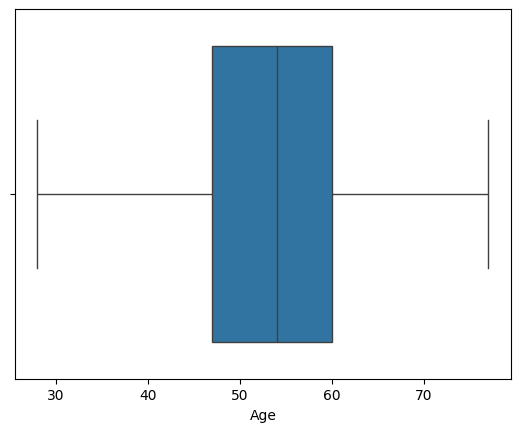

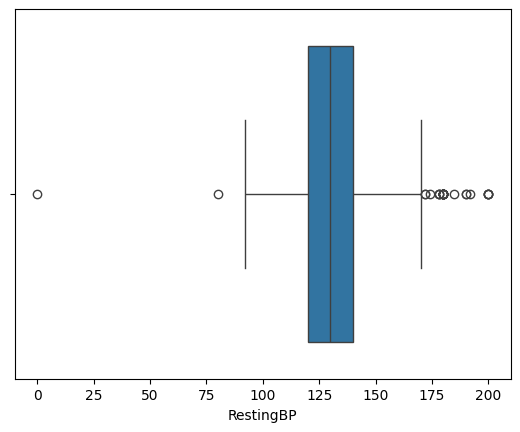

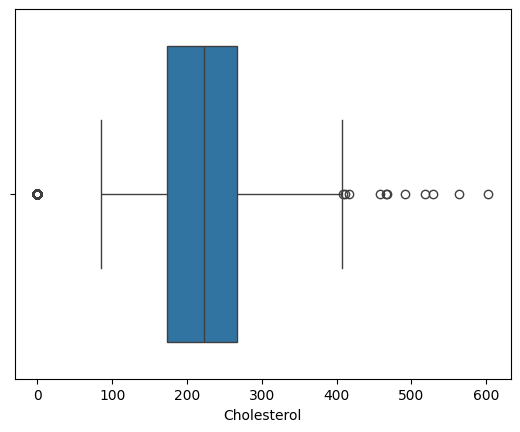

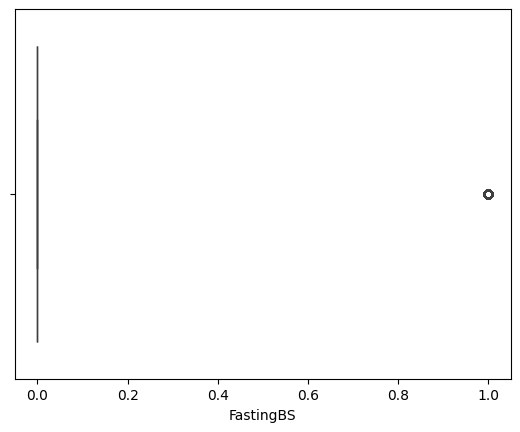

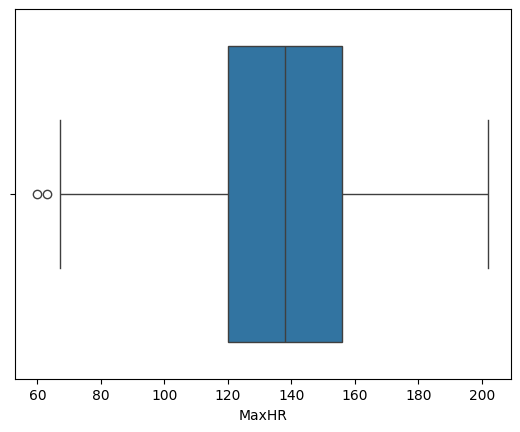

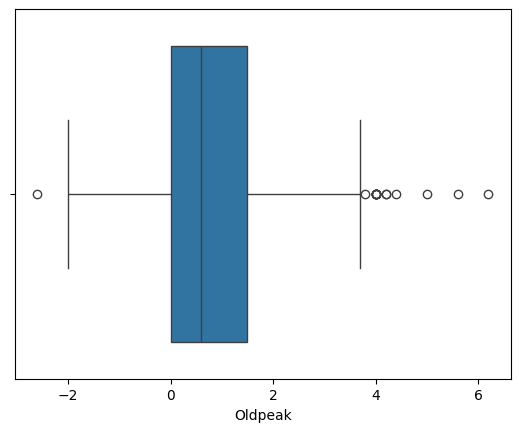

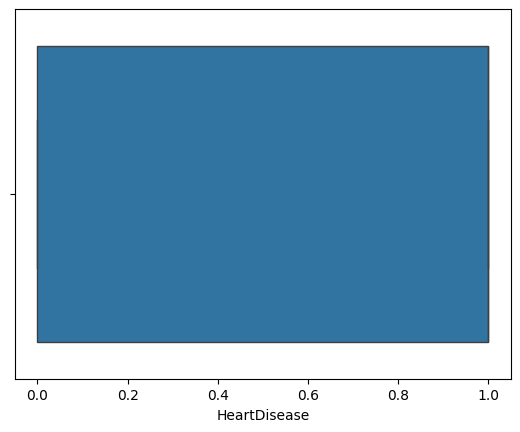

In [15]:
df_outlier=df.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.figure()
        sns.boxplot(data=df_outlier, x=column)

In [16]:
Q1 = df.select_dtypes(include=['number']).quantile(0.25)
Q3 = df.select_dtypes(include=['number']).quantile(0.75)
IQR=Q3-Q1
df = df[~((df.select_dtypes(include=['number'])<(Q1-1.5*IQR))|(df.select_dtypes(include=['number'])>(Q3+1.5*IQR))).any(axis=1)]

In [17]:
df.shape

(588, 12)

Jumlah Datasets setalah menghapus Outlier: `588, 12`

#### 2.2.3 EDA - Univariate Analysis

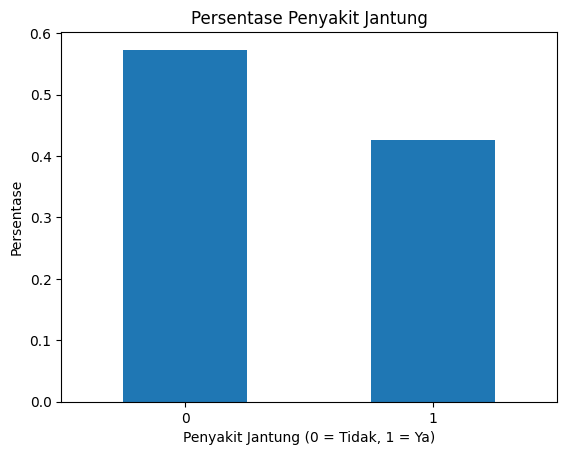

In [52]:
heart_disease_counts = df.HeartDisease.value_counts(normalize=True)

# Membuat grafik batang
heart_disease_counts.plot(kind='bar')
plt.title('Persentase Penyakit Jantung')
plt.xlabel('Penyakit Jantung (0 = Tidak, 1 = Ya)')
plt.ylabel('Persentase')
plt.xticks(rotation=0)
plt.show()

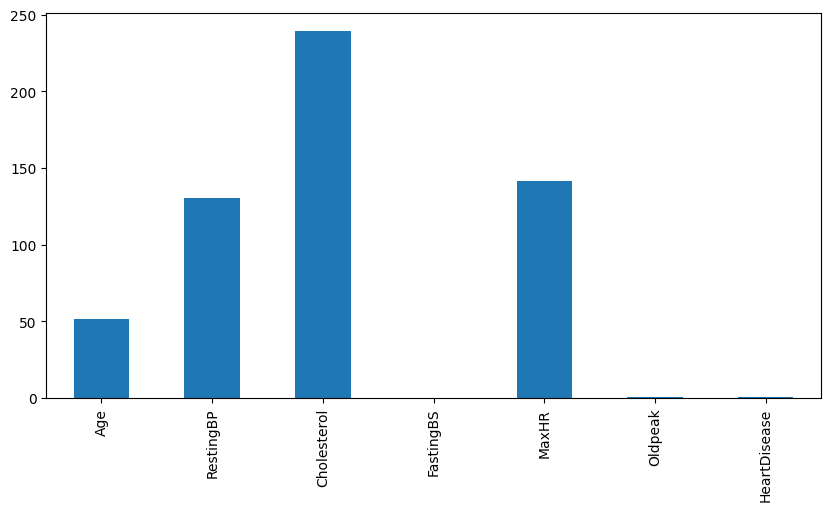

In [18]:
df.select_dtypes(include=['number']).mean().plot(kind='bar', figsize=(10, 5))
plt.show()

#### 2.2.4 EDA - Multivariate Analysis

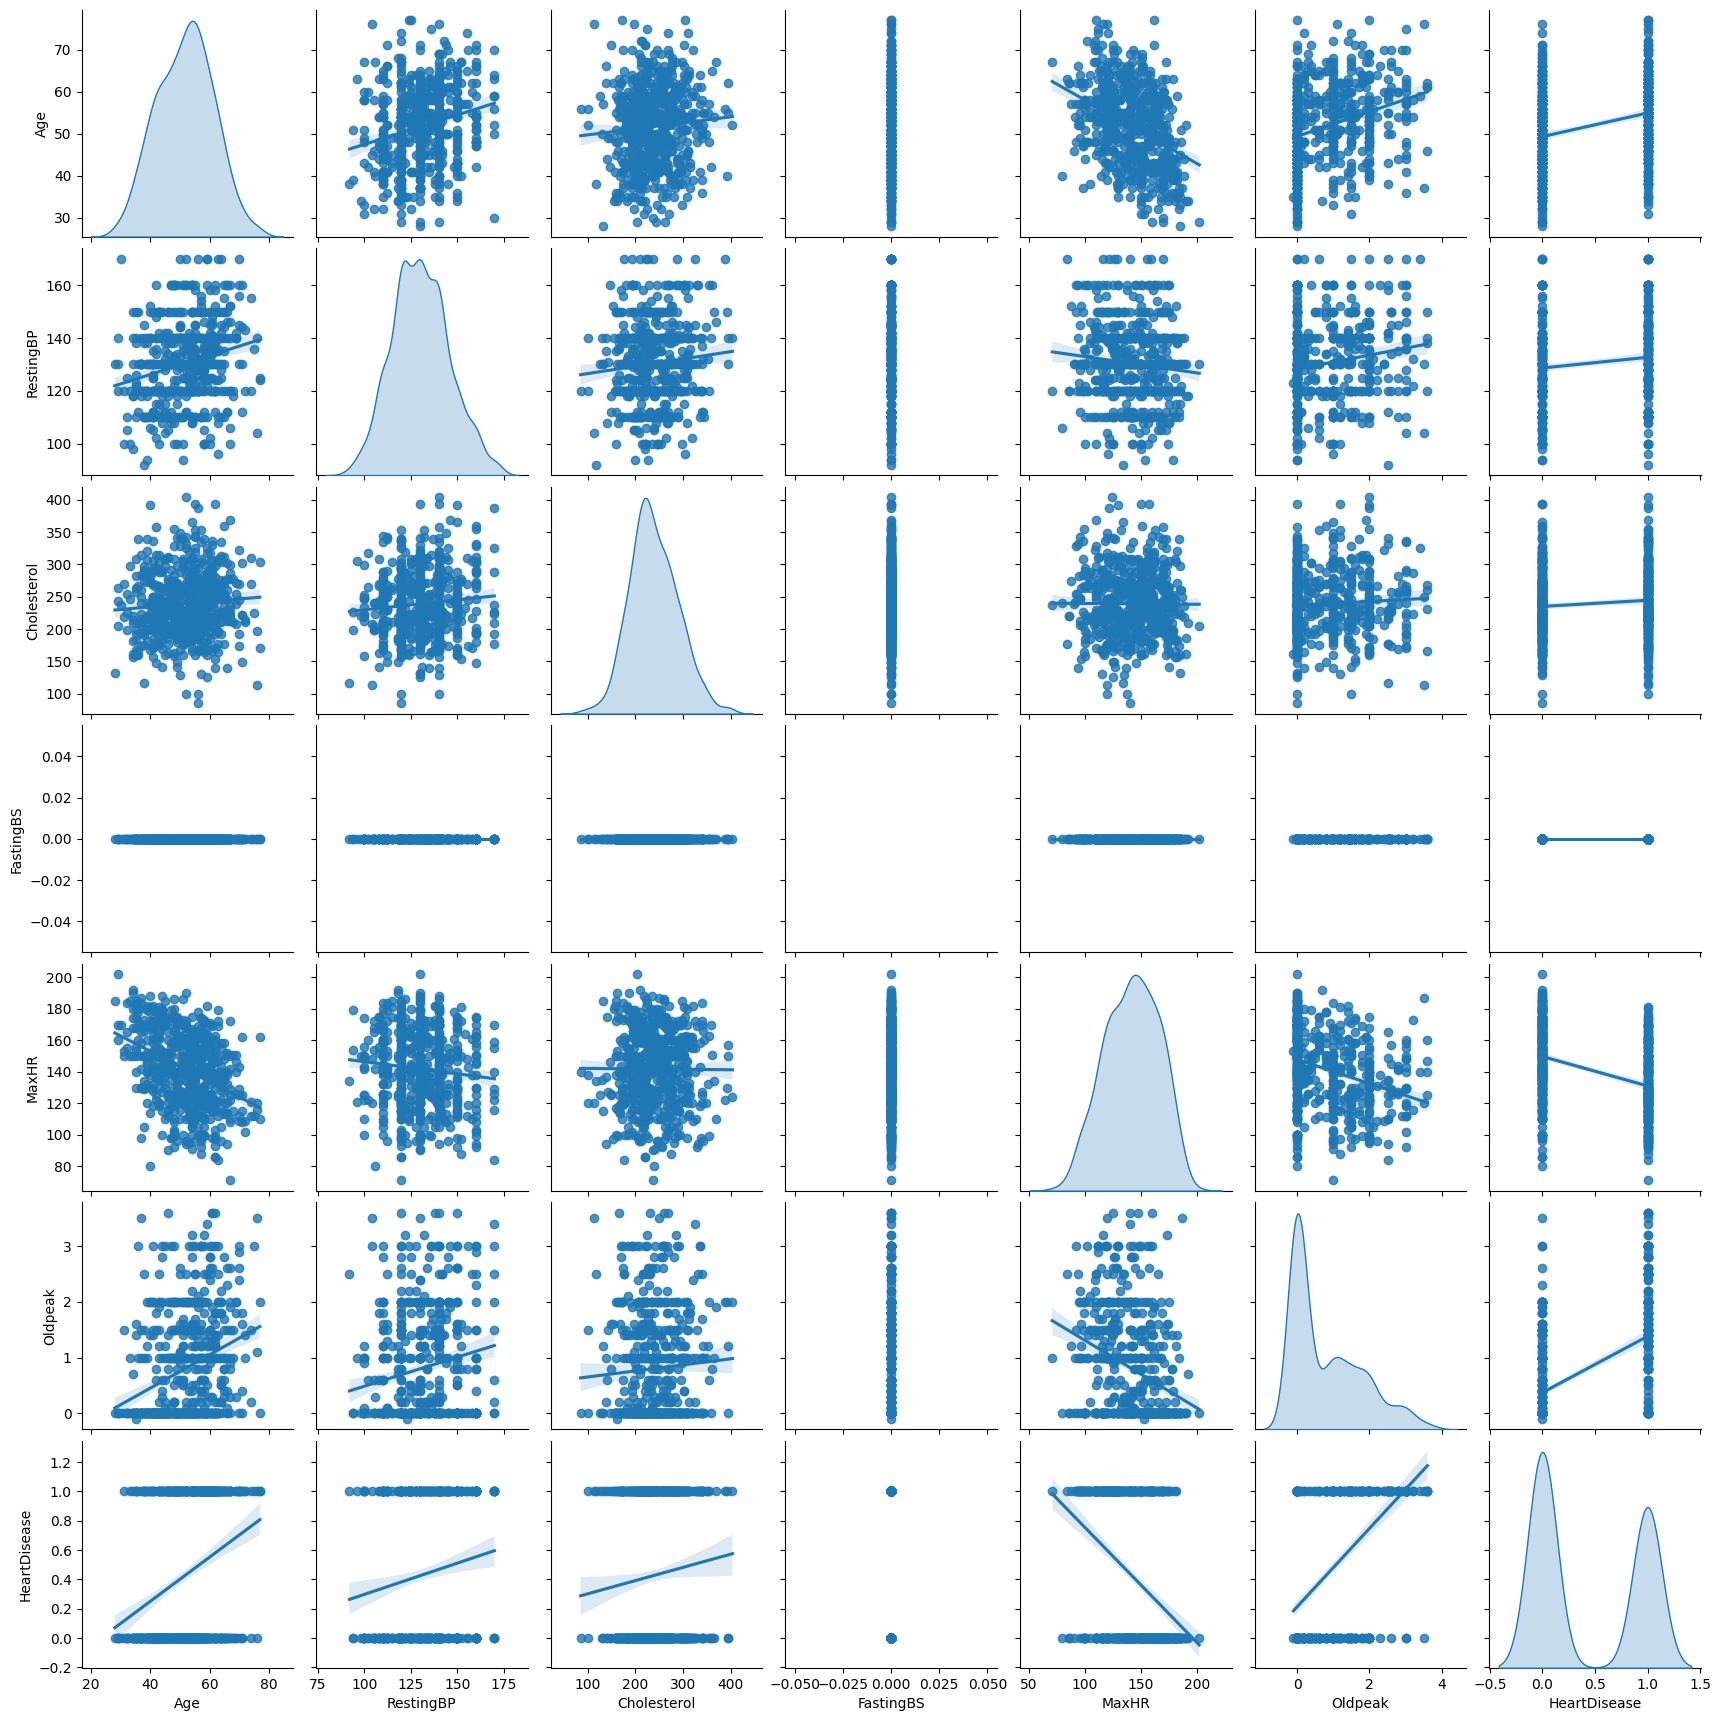

In [19]:
sns.pairplot(df, kind='reg', diag_kind='kde')

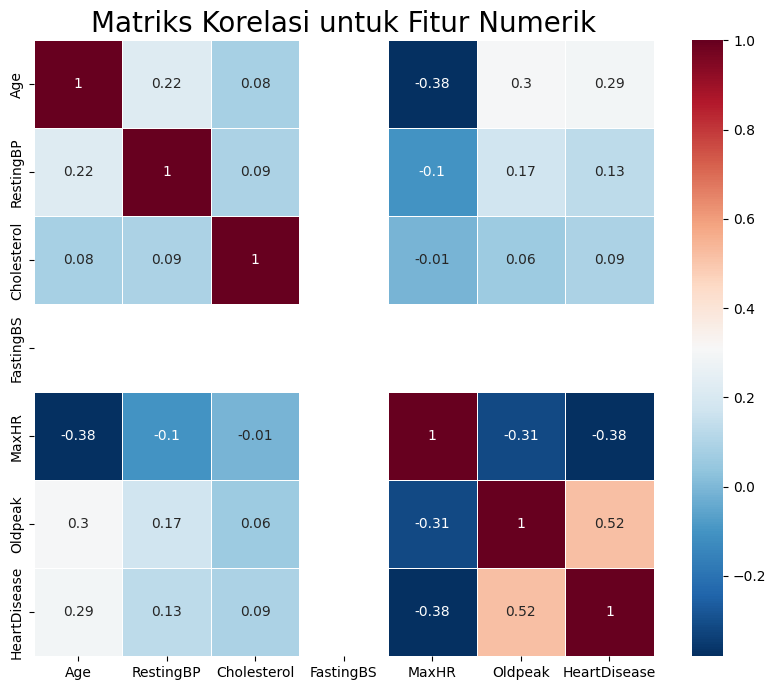

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
corr_matrix = df.select_dtypes(include=['number']).corr().round(2)
sns.heatmap(corr_matrix, ax=ax, annot=True, cmap='RdBu_r', linewidths=0.5)
ax.set_title("Matriks Korelasi untuk Fitur Numerik", fontsize=20)
plt.show()

## 3. Data Preparation

### 3.1 Data Clening

In [21]:
# Mengonversi label HeartDisease menjadi boolean numerik: 1 jika ada penyakit, 0 jika tidak
df['HeartDisease'] = df['HeartDisease'].apply(lambda x: 1 if x == 1 else 0)

<ipython-input-21-2e367c737bb2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HeartDisease'] = df['HeartDisease'].apply(lambda x: 1 if x == 1 else 0)


In [22]:
fitur = df.loc[:, df.columns != 'HeartDisease']
target = df['HeartDisease']

print(fitur.shape, target.shape)

(588, 11) (588,)


### 3.2 Train-Test-Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    fitur, target,
    test_size=0.2,
    random_state=42,
    stratify=target
)

total_data = len(fitur)
print(f"Jumlah total dataset: {total_data}")
print(f"Jumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")


Jumlah total dataset: 588
Jumlah data latih: 470
Jumlah data uji: 118


### 3.3 Encoding dan Normalisasi

In [24]:
kolom_numerik = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
kolom_kategorikal = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [25]:
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
X_train_cat = encoder.fit_transform(X_train[kolom_kategorikal])
X_test_cat = encoder.transform(X_test[kolom_kategorikal])

In [26]:
scaler = MinMaxScaler()
X_train_num = scaler.fit_transform(X_train[kolom_numerik])
X_test_num = scaler.transform(X_test[kolom_numerik])

In [27]:
X_train_final = np.hstack((X_train_num, X_train_cat.toarray()))
X_test_final = np.hstack((X_test_num, X_test_cat.toarray()))

## 4. Model Development

In [28]:
!pip install lazypredict

In [29]:
from lazypredict.Supervised import LazyClassifier

klasifikasi_otomatis = LazyClassifier(verbose=0, ignore_warnings=True)
hasil_model, hasil_prediksi = klasifikasi_otomatis.fit(X_train, X_test, y_train, y_test)
print(hasil_model.sort_values("Accuracy", ascending=False))

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 201, number of negative: 269
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 312
[LightGBM] [Info] Number of data points in the train set: 470, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.427660 -> initscore=-0.291406
[LightGBM] [Info] Start training from score -0.291406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

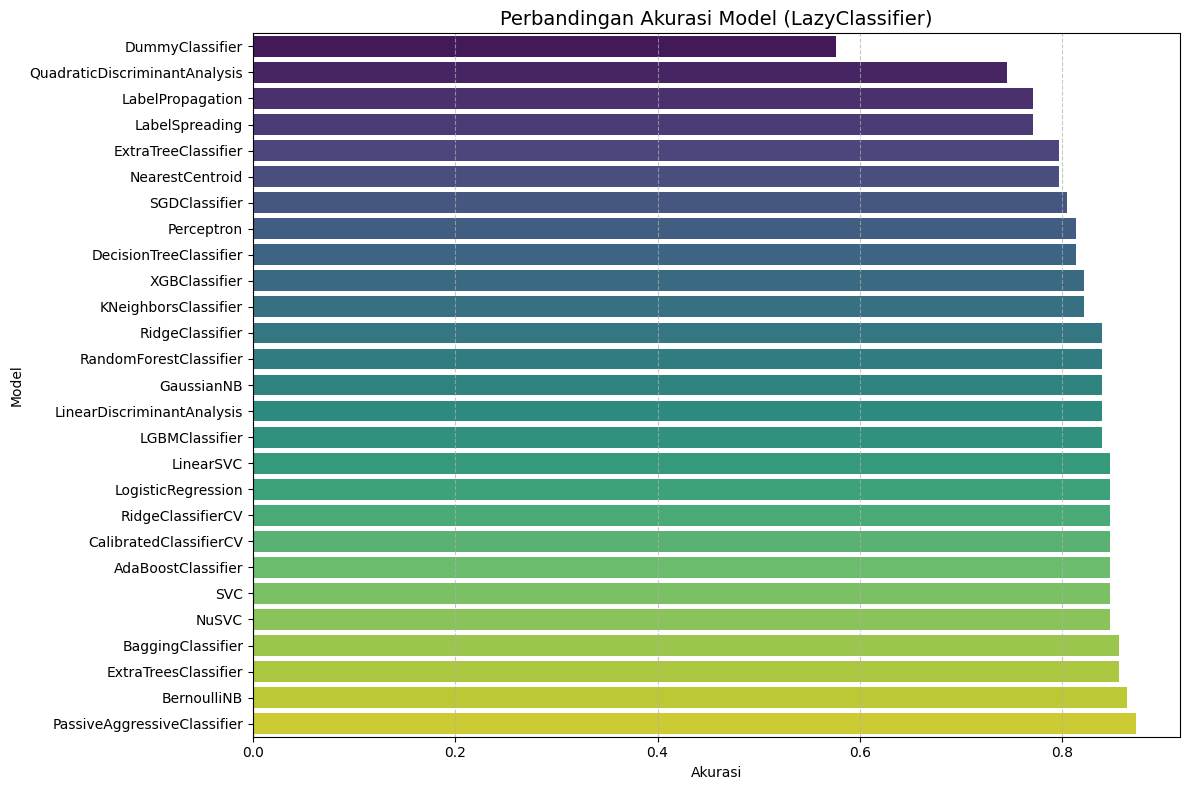

In [30]:
plt.figure(figsize=(12, 8))
sorted_results = hasil_model.sort_values(by='Accuracy', ascending=True)

# Buat barplot
sns.barplot(
    x=sorted_results['Accuracy'],
    y=sorted_results.index,
    palette='viridis'
)

plt.title('Perbandingan Akurasi Model (LazyClassifier)', fontsize=14)
plt.xlabel('Akurasi')
plt.ylabel('Model')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [31]:
models = pd.DataFrame(index=['accuracy_score'],
                      columns=['PassiveAggressiveClassifier', 'BernoulliNB', 'ExtraTreesClassifier', 'RandomForestClassifier', 'LogisticRegression'])

### 4.1 Passive Aggressive Classifier

In [35]:
model_pa = PassiveAggressiveClassifier(max_iter=1000, random_state=42)
model_pa.fit(X_train_final, y_train)

PassiveAggressiveClassifier(random_state=42)

In [37]:
pa_pred = model_pa.predict(X_test_final)
models.loc['accuracy_score', 'PassiveAggressiveClassifier'] = accuracy_score(y_test, pa_pred)

### 4.2 Bernoulli NB

In [38]:
model_nb = BernoulliNB()
model_nb.fit(X_train_final, y_train)

BernoulliNB()

In [39]:
nb_pred = model_nb.predict(X_test_final)
models.loc['accuracy_score', 'BernoulliNB'] = accuracy_score(y_test, nb_pred)

### 4.3 ExtraTrees Classifier

In [40]:
model_et = ExtraTreesClassifier(n_estimators=100, random_state=42)
model_et.fit(X_train_final, y_train)

ExtraTreesClassifier(random_state=42)

In [41]:
et_pred = model_et.predict(X_test_final)
models.loc['accuracy_score', 'ExtraTreesClassifier'] = accuracy_score(y_test, et_pred)

### 4.4 Random Forest Classifier

In [42]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_final, y_train)

RandomForestClassifier(random_state=42)

In [43]:
rf_pred = model_rf.predict(X_test_final)
models.loc['accuracy_score', 'RandomForestClassifier'] = accuracy_score(y_test, rf_pred)

### 4.5 Logistic Regression

In [44]:
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train_final, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [45]:
lr_pred = model_lr.predict(X_test_final)
models.loc['accuracy_score', 'LogisticRegression'] = accuracy_score(y_test, lr_pred)

## 5. Evaluasi Model

===== Evaluasi Model: PassiveAggressive =====
Accuracy       : 0.7881
Precision      : 0.7778
Recall         : 0.7000
F1 Score       : 0.7368

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        68
           1       0.78      0.70      0.74        50

    accuracy                           0.79       118
   macro avg       0.79      0.78      0.78       118
weighted avg       0.79      0.79      0.79       118



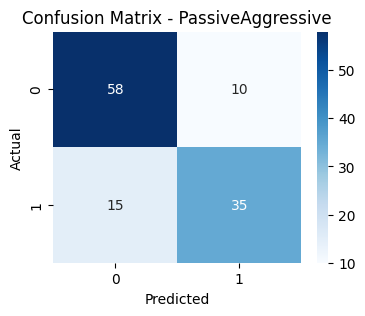

===== Evaluasi Model: BernoulliNB =====
Accuracy       : 0.8305
Precision      : 0.7586
Recall         : 0.8800
F1 Score       : 0.8148

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        68
           1       0.76      0.88      0.81        50

    accuracy                           0.83       118
   macro avg       0.83      0.84      0.83       118
weighted avg       0.84      0.83      0.83       118



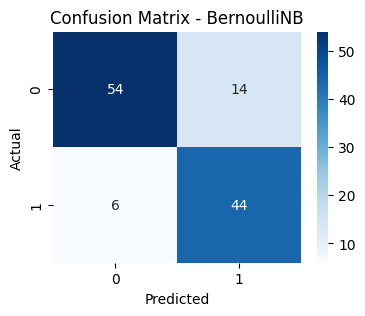

===== Evaluasi Model: ExtraTrees =====
Accuracy       : 0.8220
Precision      : 0.7544
Recall         : 0.8600
F1 Score       : 0.8037

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84        68
           1       0.75      0.86      0.80        50

    accuracy                           0.82       118
   macro avg       0.82      0.83      0.82       118
weighted avg       0.83      0.82      0.82       118



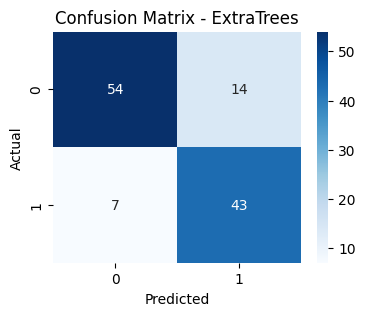

===== Evaluasi Model: RandomForest =====
Accuracy       : 0.8390
Precision      : 0.7719
Recall         : 0.8800
F1 Score       : 0.8224

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        68
           1       0.77      0.88      0.82        50

    accuracy                           0.84       118
   macro avg       0.84      0.84      0.84       118
weighted avg       0.85      0.84      0.84       118



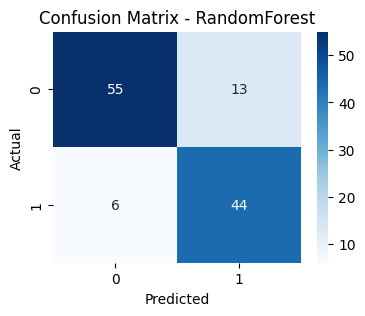

===== Evaluasi Model: LogisticRegression =====
Accuracy       : 0.8644
Precision      : 0.8036
Recall         : 0.9000
F1 Score       : 0.8491

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88        68
           1       0.80      0.90      0.85        50

    accuracy                           0.86       118
   macro avg       0.86      0.87      0.86       118
weighted avg       0.87      0.86      0.87       118



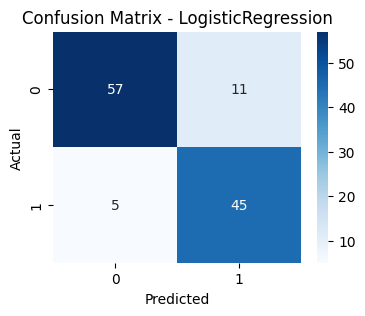

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Dictionary untuk model dan prediksi
model_dict = {
    'PassiveAggressive': model_pa,
    'BernoulliNB': model_nb,
    'ExtraTrees': model_et,
    'RandomForest': model_rf,
    'LogisticRegression': model_lr
}

# Loop evaluasi
for name, model in model_dict.items():
    y_pred = model.predict(X_test_final)

    print(f"===== Evaluasi Model: {name} =====")
    print(f"Accuracy       : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision      : {precision_score(y_test, y_pred):.4f}")
    print(f"Recall         : {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score       : {f1_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

### 📌 Kesimpulan Evaluasi Model

Berdasarkan hasil evaluasi terhadap lima model terpilih menggunakan metrik **Accuracy**, **Precision**, **Recall**, dan **F1-score**, dapat disimpulkan sebagai berikut:

1. **Logistic Regression**
   - Merupakan model dengan performa terbaik.
   - Memiliki **accuracy tertinggi** sebesar **86%**.
   - Menunjukkan keseimbangan yang sangat baik antara **precision** (80.36%) dan **recall** (90.00%).
   - Cocok digunakan jika ingin meminimalkan false negative (misalnya untuk kasus diagnosis penyakit jantung).

2. **Random Forest**
   - Memberikan hasil akurasi cukup tinggi yaitu **83%**.
   - Precision dan recall juga tinggi dan seimbang.
   - Stabil, mampu menangani data kompleks dan tidak mudah overfitting.

3. **Bernoulli Naive Bayes**
   - Akurasi mencapai **83%**, dengan **recall tertinggi kedua** (88.00%).
   - Cocok digunakan ketika lebih penting untuk mendeteksi semua kasus positif meskipun dengan precision yang sedikit lebih rendah (75.86%).

4. **Extra Trees Classifier**
   - Akurasi sebesar **82%**.
   - F1-score cukup kuat (**80.37%**) dengan recall juga tinggi (86.00%).
   - Alternatif ringan dibanding Random Forest dengan performa mendekati.

5. **Passive Aggressive Classifier**
   - Memiliki akurasi paling rendah di antara lima model yaitu **78%**.
   - Recall juga lebih rendah (**70.00%**) yang berarti masih banyak kasus positif tidak terdeteksi.
   - Kurang direkomendasikan sebagai model utama.


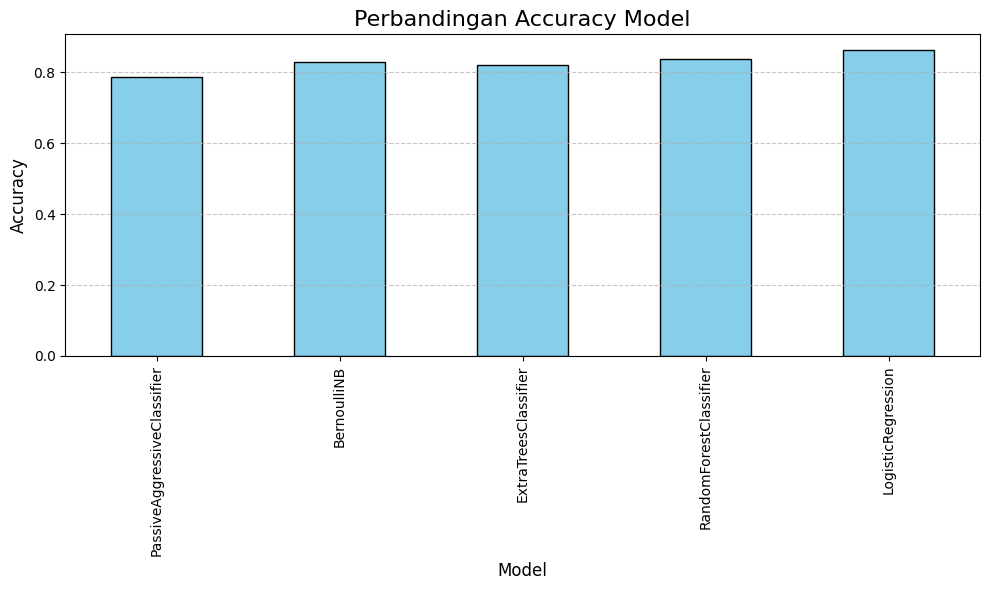

In [51]:
plt.figure(figsize=(10, 6))
models.loc['accuracy_score'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Perbandingan Accuracy Model', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()